# Quick performance profile

After re-implementing the cellular automata using Numpy's vectorized operations, the execution time is cut in about half, showing about a second per loop for the generic implementation versus about half a second for the numpy implementation.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from ca import carule
from canp import CellularAutomaton

In [10]:
%matplotlib inline

1 loop, best of 3: 1.17 s per loop


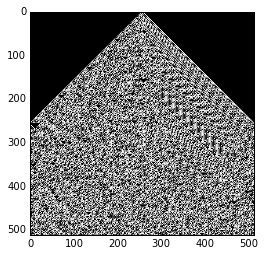

In [11]:
def apply(rule, img):
    height = img.shape[0]
    for y in range(height-1):
        row = img[y]
        img[y+1,:] = np.array(rule(row), dtype=img.dtype)
    return img

rule = carule(30,2,1)

img2 = np.zeros((512,512), dtype=np.int)
img2[0,255] = 1

%timeit apply(rule, img2)

plt.imshow(img2, cmap='gray')

Interestingly, the test exposes a bug in the old code, which produced results that are flipped left-to-right compared to the conventional order shown for the automaton.

1 loop, best of 3: 587 ms per loop


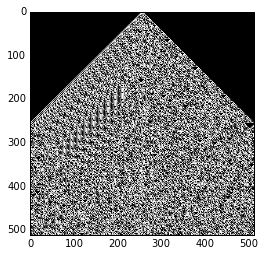

In [12]:
ca = CellularAutomaton(30,2,1)

img = np.zeros((512,512), dtype=np.int)
img[0,255] = 1

%timeit ca.apply(img)

plt.imshow(img, cmap='gray')

         56 function calls (54 primitive calls) in 0.603 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:996(_handle_fromlist)
        1    0.000    0.000    0.603    0.603 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 <string>:12(__new__)
        2    0.000    0.000    0.000    0.000 api.py:176(typeof)
      2/1    0.603    0.301    0.603    0.603 canp.py:15(apply)
      2/1    0.000    0.000    0.000    0.000 canp.py:28(make_region_index)
        2    0.000    0.000    0.000    0.000 cffi_utils.py:27(is_ffi_instance)
        2    0.000    0.000    0.000    0.000 cffi_utils.py:37(is_cffi_func)
        2    0.000    0.000    0.000    0.000 dispatcher.py:345(typeof_pyval)
        1    0.000    0.000    0.000    0.000 dispatcher.py:411(__get__)
        2    0.000    0.000    0.000    0.000 functools.py:704(dispatch)
        2    0

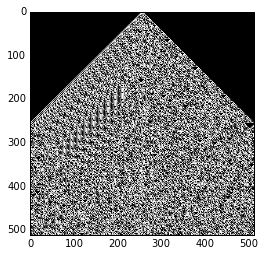

In [14]:
import cProfile

ca = CellularAutomaton(30,2,1)

img = np.zeros((512,512), dtype=np.int)
img[0,255] = 1

cProfile.run('ca.apply(img)')